<a href="https://colab.research.google.com/github/spencer18001/machine-learning-zoomcamp/blob/main/02/hw_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!wget -O laptops.csv https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_path = "laptops.csv"
df = pd.read_csv(df_path)

In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [5]:
df = df[['ram', 'storage', 'screen', 'final_price']]
df

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01
...,...,...,...,...
2155,16,1000,17.3,2699.99
2156,16,1000,17.3,2899.99
2157,32,1000,17.3,3399.99
2158,16,1000,13.4,1899.99


In [6]:
for col in df.columns:
    print(f"Column: {col}")
    print(f"Data type: {df[col].dtype}")
    print(f"First 5 unique values: {df[col].unique()[:5]}")
    print(f"Number of unique values: {df[col].nunique()}")
    print()

Column: ram
Data type: int64
First 5 unique values: [ 8 16 32 12  4]
Number of unique values: 9

Column: storage
Data type: int64
First 5 unique values: [ 512  256 1000   64  128]
Number of unique values: 12

Column: screen
Data type: float64
First 5 unique values: [15.6 17.3 14.  16.1 13.3]
Number of unique values: 29

Column: final_price
Data type: float64
First 5 unique values: [1009.    299.    789.   1199.    669.01]
Number of unique values: 1440



<Axes: xlabel='final_price', ylabel='Count'>

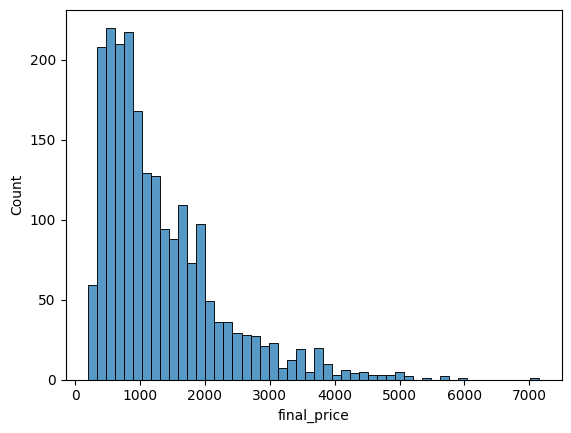

In [7]:
sns.histplot(df.final_price, bins=50) # long tail

In [8]:
df.final_price.skew() # >1: high right skewness

1.6495877663192549

In [9]:
df.isnull().sum()[df.isnull().sum() > 0].index[0] # Q1

'screen'

In [10]:
df.ram.median() # Q2

16.0

In [11]:
np.random.seed(42)

n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

idx = np.arange(n)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]].reset_index(drop=True)
df_val = df.iloc[idx[n_train:n_train+n_val]].reset_index(drop=True)
df_test = df.iloc[idx[n_train+n_val:]].reset_index(drop=True)

y_train = df_train.final_price.values
y_val = df_val.final_price.values
y_test = df_test.final_price.values
del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

In [12]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y) # normal equation
    return w_full[0], w_full[1:]

In [13]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [14]:
def prepare_X(df, na_opt='zero'):
    df = df.copy()

    if na_opt == 'mean':
        df.fillna(df.mean(), inplace=True)
    else:
        df.fillna(0, inplace=True)
    X = df.values
    return X

In [15]:
X_train = prepare_X(df_train, na_opt='zero')
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
score_0 = round(rmse(y_val, y_pred), 2)
score_0

597.36

In [16]:
X_train = prepare_X(df_train, na_opt='mean')
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
score_mean = round(rmse(y_val, y_pred), 2)
score_mean

597.74

In [17]:
'With 0' if score_0 < score_mean else ('With mean' if score_0 > score_mean else 'Both are equally good') # Q3

'With 0'

In [18]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [19]:
r_list = [0, 0.01, 0.1, 1, 5, 10, 100]
score_list = []
for r in r_list:
    X_train = prepare_X(df_train, na_opt='zero')
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score_list.append(round(rmse(y_val, y_pred), 2))

r_list[np.argmin(score_list)], score_list # Q4

(5, [597.36, 597.36, 597.35, 597.21, 597.01, 597.06, 597.9])

In [20]:
score_list = []
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    np.random.seed(seed)

    n = len(df)
    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test

    idx = np.arange(n)
    np.random.shuffle(idx)

    df_train = df.iloc[idx[:n_train]].reset_index(drop=True)
    df_val = df.iloc[idx[n_train:n_train+n_val]].reset_index(drop=True)
    df_test = df.iloc[idx[n_train+n_val:]].reset_index(drop=True)

    y_train = df_train.final_price.values
    y_val = df_val.final_price.values
    y_test = df_test.final_price.values
    del df_train['final_price']
    del df_val['final_price']
    del df_test['final_price']

    X_train = prepare_X(df_train, na_opt='zero')
    w0, w = train_linear_regression(X_train, y_train)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score_list.append(rmse(y_val, y_pred))

round(np.std(score_list), 3) # Q5

29.176

In [21]:
np.random.seed(9)

n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

idx = np.arange(n)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]].reset_index(drop=True)
df_val = df.iloc[idx[n_train:n_train+n_val]].reset_index(drop=True)
df_test = df.iloc[idx[n_train+n_val:]].reset_index(drop=True)

y_train = df_train.final_price.values
y_val = df_val.final_price.values
y_test = df_test.final_price.values
del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

In [22]:
df_full_train = pd.concat([df_train, df_val]).reset_index(drop=True)
y_full_train = np.concatenate([y_train, y_val])

In [23]:
X_full_train = prepare_X(df_full_train, na_opt='zero')
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
round(rmse(y_test, y_pred), 2) # 6

608.61